In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Step 1: CSV 파일을 읽어오기
file_path = 'source/raw_vol2.0.csv'
df = pd.read_csv(file_path)

In [10]:
df.columns

Index(['MEET', 'RC_DATE', 'RC_NO', 'RC_DIST', 'RANK', 'WEATHER', 'TR_CON',
       'TR_WC', 'ORD', 'CHUL_NO', 'HR_NAME', 'HR_NO', 'NAME', 'PRD_NAME',
       'AGE', 'SEX', 'horse_weight', 'weight_gain', 'RC_TIME', 'ORD1_CNT_T',
       'ORD2_CNT_T', 'RC_CNT_T', 'ORD1_CNT_Y', 'ORD2_CNT_Y', 'RC_CNT_Y',
       'WG_BUDAM', 'JK_NAME', 'JK_NO', 'JK_AGE', 'JK_CAREER', 'JK_ORD1_CNT_T',
       'JK_ORD2_CNT_T', 'JK_RC_CNT_T', 'JK_ORD1_CNT_Y', 'JK_ORD2_CNT_Y',
       'JK_RC_CNT_Y', 'TR_NAME', 'TR_NO', 'TR_AGE', 'TR_CAREER',
       'TR_ORD1_CNT_T', 'TR_ORD2_CNT_T', 'TR_RC_CNT_T', 'TR_ORD1_CNT_Y',
       'TR_ORD2_CNT_Y', 'TR_RC_CNT_Y', 'HR_ORD1_CNT_T', 'HR_ORD2_CNT_T',
       'HR_RC_CNT_T', 'SJ_S1F_ORD', 'SJ_1C_ORD', 'SJ_2C_ORD', 'SJ_3C_ORD',
       'SJ_G3F_ORD', 'SJ_4C_ORD', 'SJ_G1F_ORD', 'SE_S1F_ACC_TIME',
       'SE_1C_ACC_TIME', 'SE_2C_ACC_TIME', 'SE_3C_ACC_TIME', 'SE_G3F_ACC_TIME',
       'SE_4C_ACC_TIME', 'SE_G1F_ACC_TIME', 'JE_S1F_TIME', 'JE_1C_TIME',
       'JE_2C_TIME', 'JE_3C_TIME', 'JE_G3F_

In [11]:
df = df.loc[:, ['RC_DIST', 'RANK', 'WEATHER', 'TR_CON',
       'TR_WC', 'ORD', 'CHUL_NO', 'NAME', 'AGE', 'SEX', 'horse_weight', 'weight_gain', 'RC_TIME', 'ORD1_CNT_T',
       'ORD2_CNT_T', 'RC_CNT_T', 'ORD1_CNT_Y', 'ORD2_CNT_Y', 'RC_CNT_Y', 'WG_BUDAM', 'JK_NAME', 'JK_NO', 'JK_AGE',
       'JK_CAREER', 'JK_ORD1_CNT_T', 'JK_ORD2_CNT_T', 'JK_RC_CNT_T', 'JK_ORD1_CNT_Y', 'JK_ORD2_CNT_Y',
       'JK_RC_CNT_Y', 'TR_CAREER', 'TR_ORD1_CNT_T', 'TR_ORD2_CNT_T', 'TR_RC_CNT_T',
       'TR_ORD1_CNT_Y', 'TR_ORD2_CNT_Y', 'TR_RC_CNT_Y', 'HR_ORD1_CNT_T', 'HR_ORD2_CNT_T',
       'HR_RC_CNT_T']]

In [12]:
df = df[df['ORD'] <= 6]
df = df.loc[:,['RC_DIST', 'RANK', 'AGE', 'SEX', 'horse_weight', 'weight_gain',
               'WG_BUDAM', 'JK_CAREER', 'TR_CAREER', 'ORD']]

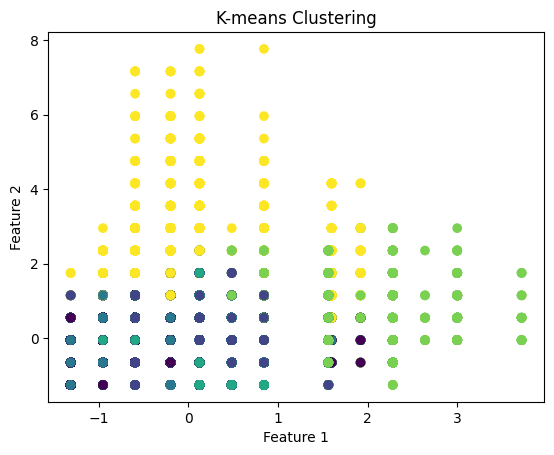

In [13]:
# Step 2: 필요한 전처리 수행하기
# 필요에 따라 군집화를 위한 열을 선택합니다.
# 예시로 숫자형 열만 선택합니다.
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
data = numeric_cols.dropna()  # 결측값 제거

# Step 3: 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: K-means 알고리즘 적용
kmeans = KMeans(n_clusters=6, random_state=42)  # 군집 수는 3개로 설정 (필요에 따라 변경)
kmeans.fit(scaled_data)

# 군집 결과 추가
data['cluster'] = kmeans.labels_

# Step 5: 군집 시각화 (2D로 시각화할 수 있는 경우)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


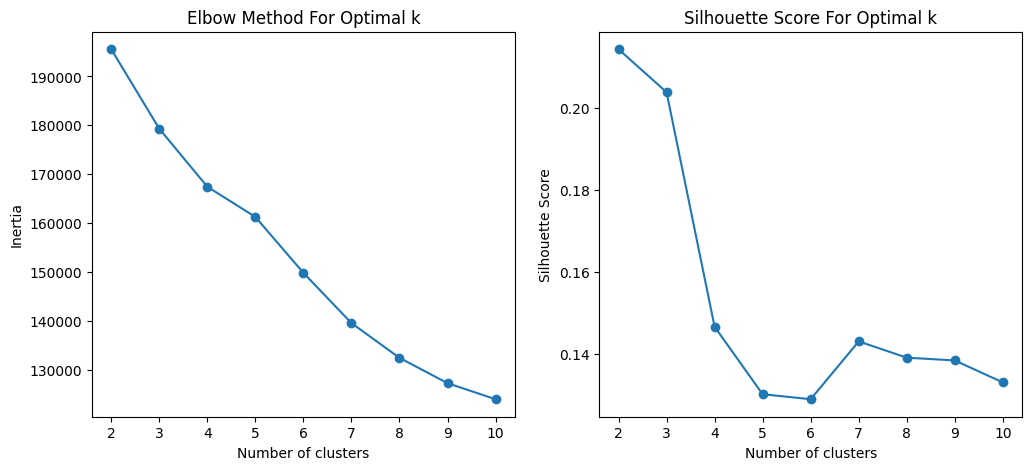

In [14]:
from sklearn.metrics import silhouette_score

# 엘보 방법 예시
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# 엘보 방법 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


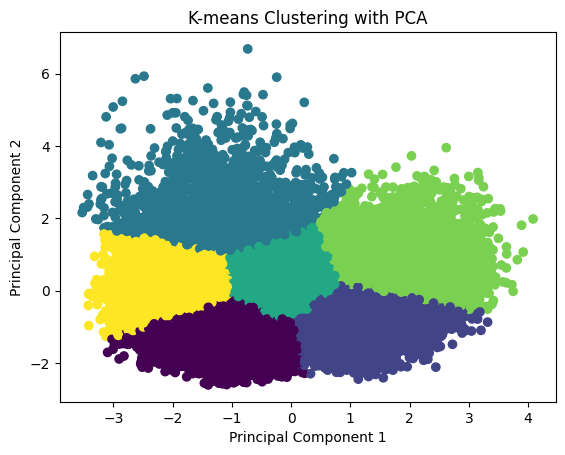

In [15]:
from sklearn.decomposition import PCA

# PCA를 사용해 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-means 군집화 수행
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_data)
pca.explained_variance_ratio_

# 군집화 결과 시각화
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()



In [16]:
"""
import matplotlib.pyplot as plt

# 각 군집을 확인하기 위한 반복문
for i in range(3):  # 군집 개수만큼 반복 (0, 1, 2)
    cluster_data = pca_data[kmeans.labels_ == i]
    
    # 군집 내 데이터 시각화
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with PCA - Cluster {i}')
    plt.legend()
    plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\n# 각 군집을 확인하기 위한 반복문\nfor i in range(3):  # 군집 개수만큼 반복 (0, 1, 2)\n    cluster_data = pca_data[kmeans.labels_ == i]\n    \n    # 군집 내 데이터 시각화\n    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)\n    plt.xlabel('Principal Component 1')\n    plt.ylabel('Principal Component 2')\n    plt.title(f'K-means Clustering with PCA - Cluster {i}')\n    plt.legend()\n    plt.show()\n"

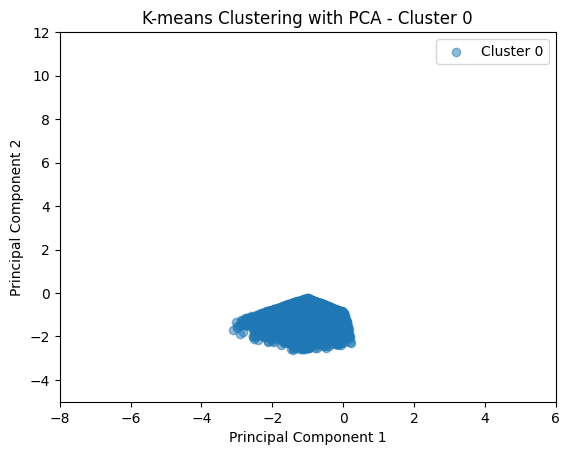

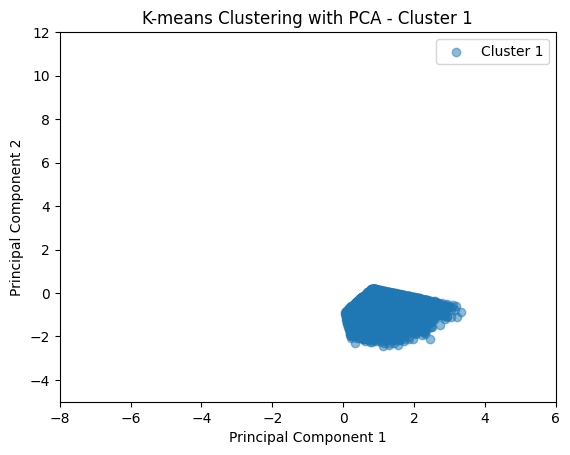

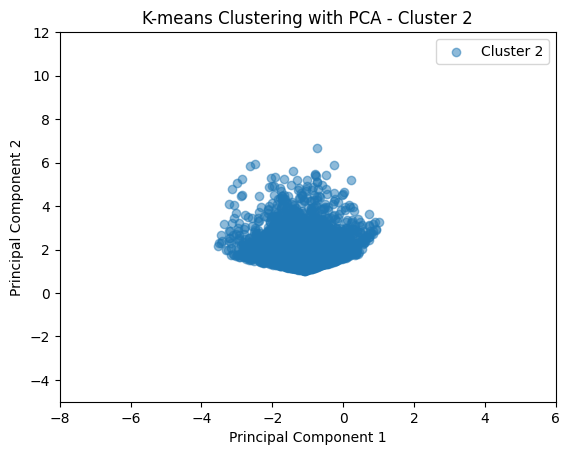

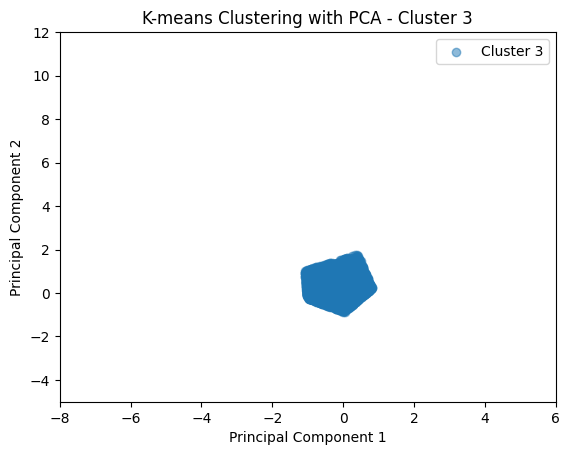

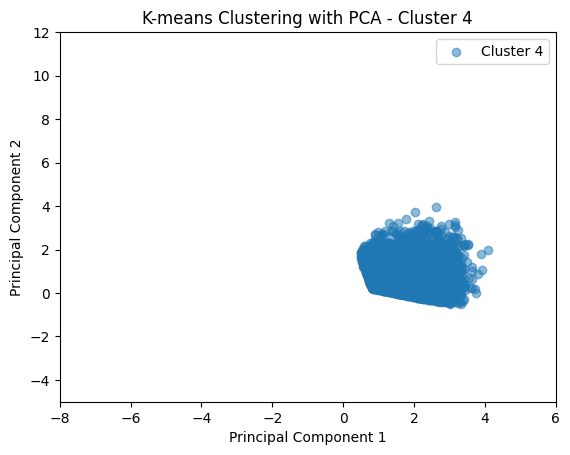

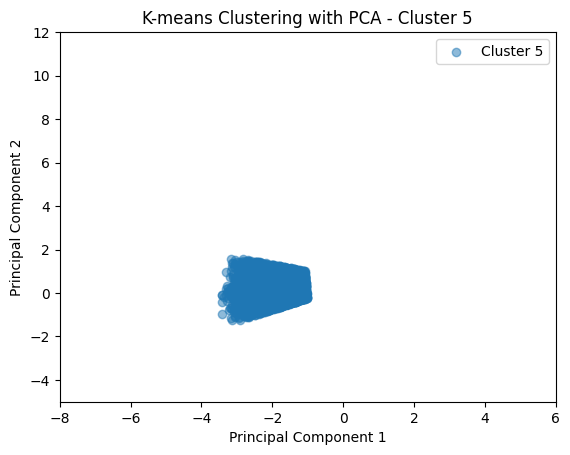

In [17]:
import matplotlib.pyplot as plt

# 고정할 x축과 y축 범위 지정
x_lim = (-8, 6)
y_lim = (-5, 12)

# 각 군집을 확인하기 위한 반복문
for i in range(6):  # 군집 개수만큼 반복 (0, 1, 2)
    cluster_data = pca_data[kmeans.labels_ == i]
    
    # 군집 내 데이터 시각화
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with PCA - Cluster {i}')
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.legend()
    plt.show()


In [18]:
# feature_names를 PCA 결과와 일치하게 조정
feature_names = [f'Feature{i}' for i in range(1, pca.components_.shape[1] + 1)]

# DataFrame 생성
pca_components = pd.DataFrame(pca.components_, columns=feature_names)
pca_components.index = ['Principal Component 1', 'Principal Component 2']

# 주요 기여 요소 확인
print(pca_components)


                       Feature1  Feature2  Feature3  Feature4  Feature5  \
Principal Component 1  0.525260 -0.106024  0.600345  0.048566 -0.304390   
Principal Component 2  0.285858  0.734769 -0.038170  0.042497 -0.025446   

                       Feature6  Feature7  Feature8  
Principal Component 1 -0.375211 -0.340588 -0.025513  
Principal Component 2 -0.052539  0.188080  0.579961  


In [19]:
# 주성분별로 절대값 기준 상위 5개 변수 찾기
for i in range(2):  # 두 개의 주성분이므로 0, 1로 반복
    component = pca_components.iloc[i]
    top_features = component.abs().nlargest(5)  # 절대값이 큰 상위 5개 변수 추출
    print(f"Principal Component {i+1} top contributing features:")
    print(top_features)
    print()


Principal Component 1 top contributing features:
Feature3    0.600345
Feature1    0.525260
Feature6    0.375211
Feature7    0.340588
Feature5    0.304390
Name: Principal Component 1, dtype: float64

Principal Component 2 top contributing features:
Feature2    0.734769
Feature8    0.579961
Feature1    0.285858
Feature7    0.188080
Feature6    0.052539
Name: Principal Component 2, dtype: float64



In [20]:
import pandas as pd

# df의 열 이름을 Feature1, Feature2, ... 순서대로 매칭
feature_names = df.columns

# 주요 기여 변수를 매칭하여 출력
for i in range(2):  # 두 개의 주성분이므로 0, 1로 반복
    component = pca_components.iloc[i]
    top_features = component.abs().nlargest(5)  # 절대값이 큰 상위 5개 변수 추출
    
    # 매칭 결과 출력
    print(f"Principal Component {i+1} top contributing features:")
    for feature, value in top_features.items():
        feature_name = feature_names[int(feature[7:]) - 1]  # Feature 인덱스를 사용하여 매칭
        print(f"{feature_name}: {value}")
    print()


Principal Component 1 top contributing features:
AGE: 0.600345354887521
RC_DIST: 0.525259770290738
weight_gain: 0.3752108003365123
WG_BUDAM: 0.3405880049082862
horse_weight: 0.30439042523322474

Principal Component 2 top contributing features:
RANK: 0.7347691869571091
JK_CAREER: 0.5799606989160907
RC_DIST: 0.2858584990503479
WG_BUDAM: 0.18807961636506682
weight_gain: 0.05253893419824085



In [25]:
scaled_data

array([[-1.31387083, -0.66088662, -0.6378617 , ..., -0.5286974 ,
         1.23580907, -1.46294352],
       [-1.31387083, -0.66088662, -0.91541605, ..., -0.03439055,
         1.49815955, -0.87753391],
       [-1.31387083, -0.05872878, -1.03436791, ...,  0.58349301,
         1.23580907, -0.2921243 ],
       ...,
       [ 0.12326464, -0.05872878,  0.71025941, ..., -0.65227411,
         0.18640714,  0.29328531],
       [ 0.12326464, -0.05872878,  1.01755172, ...,  0.21276287,
        -0.33829382,  0.87869492],
       [ 0.12326464,  0.54342905,  1.067115  , ...,  0.58349301,
        -0.07594334,  1.46410453]])

In [31]:
type(scaled_data)

numpy.ndarray

In [32]:
import numpy as np
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
# print( np.unique(clusters) )

data['cluster'] = clusters


In [35]:
data.groupby('cluster').mean()

,RC_DIST,AGE,horse_weight,weight_gain,WG_BUDAM,JK_CAREER,TR_CAREER,ORD
cluster,,,,,,,,
0,960.999429,3.704740,287.984580,-0.596421,55.937559,17.631829,11.138587,3.018466
1,1238.687898,3.551752,461.236943,-4.176592,53.487102,9.420382,14.773726,4.118631
2,948.532575,3.804055,281.607368,-0.446038,54.983743,15.097787,25.920757,3.633700
3,1250.671087,3.305003,473.897328,6.062688,54.224734,11.460117,14.742616,2.726743
4,1670.466837,4.493622,481.655612,-0.200510,54.363138,10.283418,14.879082,3.525255
5,1155.399198,7.836675,291.719285,-0.248633,56.358549,15.986876,20.740066,3.967189
